In [10]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
reload(a2)
from IPython.display import display, HTML
from flutype.models import Spot
import preprocessing as pre
#from preprocessing import mean_on_analyte_batch, 
import seaborn as sns
from itertools import combinations
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.cm as cm

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
django.setup()


In [15]:
studies = ["microarray_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
spots_dj = spots_dj.filter(raw_spot__lig_mob_batch__sid = "A/Perth/16/2009(H3N2)-2018-04-13")

#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)
cs = ["2018_03_21_slide_31",]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)
data = a2.Data(spots_dj=spots_dj)

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/seaborn/categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


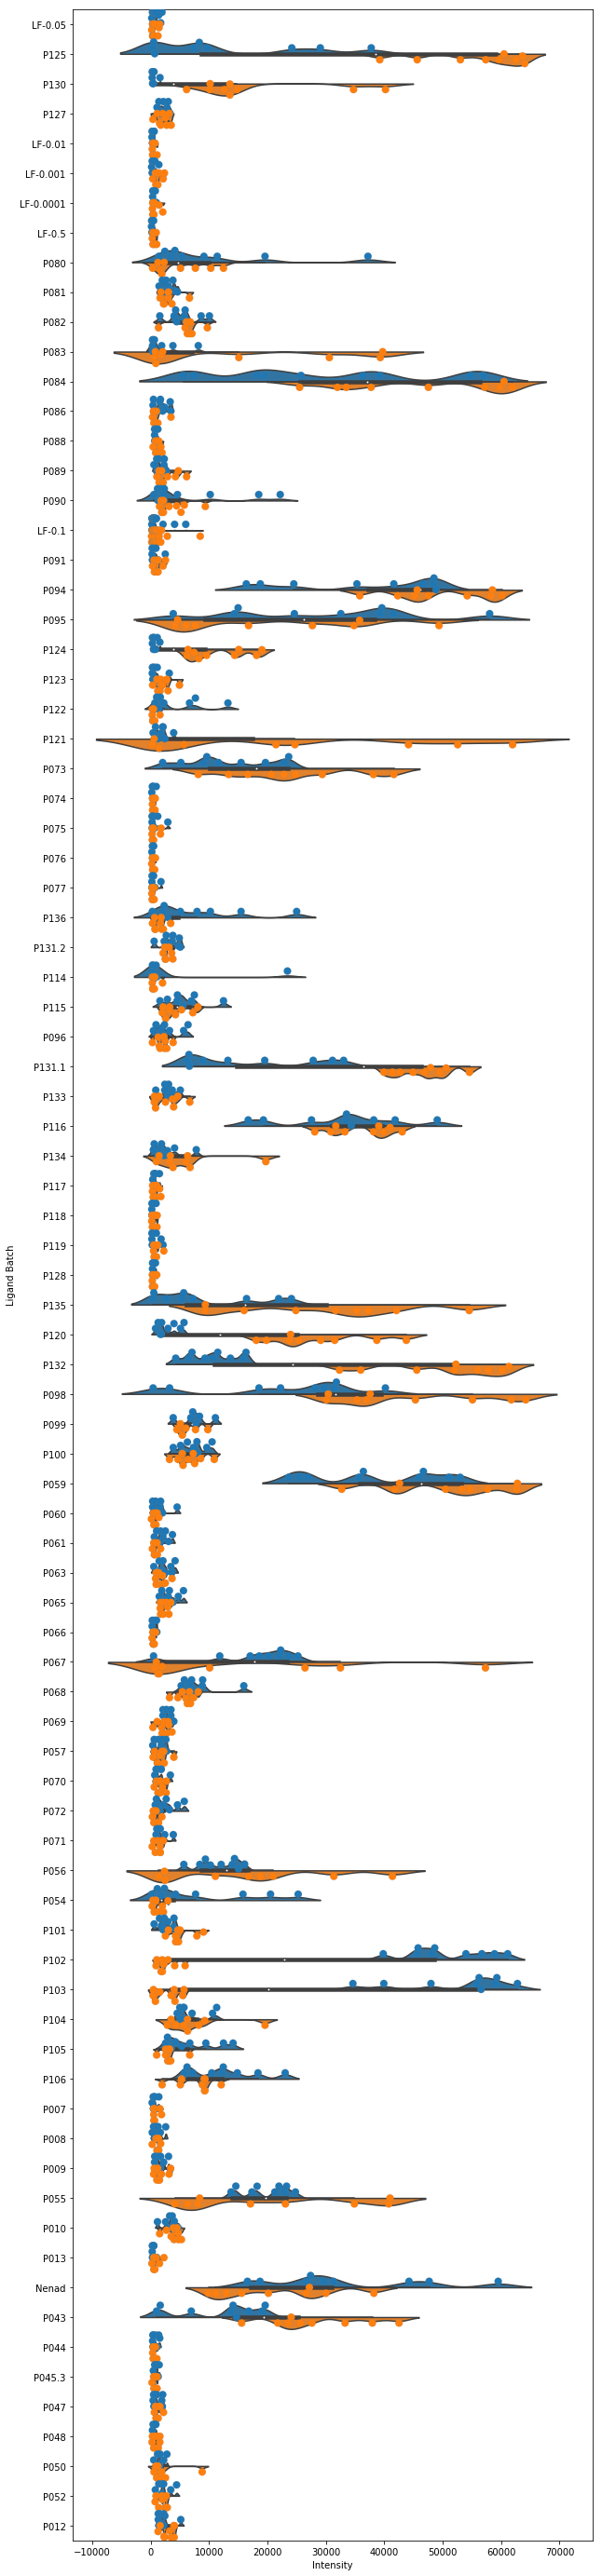

In [27]:


fig ,ax = plt.subplots(figsize=(10,50))

ax = sns.violinplot(y="Ligand Batch",
                    x="Intensity",
                    bw=.2, 
                    hue="Collection",
                    scale="width", 
                    data=data.spots_pd.sort_values(by="Collection"),
                    split=True,
                    )
ax = sns.swarmplot(y="Ligand Batch",
                   hue="Collection", 
                   x="Intensity",
                   #palette=sns.color_palette("inferno",n_colors=3),
                   data=data.spots_pd.sort_values(by="Collection"),
                   size=8,
                   split=True,
                  edgecolor="grey",
                   linewidth=0.1,)
        
ax.legend_.remove()
plt.show()

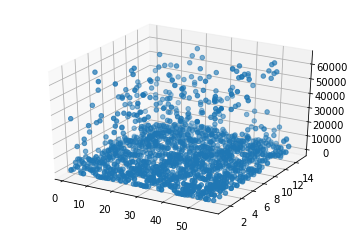

In [37]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.scatter(xs=data.spots_pd["Row"],ys=data.spots_pd["Column"],zs =data.spots_pd["Intensity"])
#data.spots_pd.scatter(x="Row",y="Column",z ="Intensity")
plt.show()

In [47]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import preprocessing


2.5.1


,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Replica
0,LF-0.05,0.0500,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),828.251196,929.858152,0.097222,2018_03_21_slide_30,microarray_2018_03_21,1.0,1.0,0.0
1,LF-0.05,0.0500,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),727.182156,842.928031,0.093750,2018_03_21_slide_30,microarray_2018_03_21,1.0,2.0,1.0
2,LF-0.05,0.0500,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),959.745562,2817.127733,0.125000,2018_03_21_slide_30,microarray_2018_03_21,1.0,3.0,2.0
3,LF-0.05,0.0500,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),773.739229,830.765591,0.097222,2018_03_21_slide_30,microarray_2018_03_21,1.0,4.0,3.0
4,LF-0.05,0.0500,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),490.552050,701.676304,0.156250,2018_03_21_slide_30,microarray_2018_03_21,1.0,5.0,4.0
5,LF-0.05,0.0500,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),668.030854,734.578887,0.000000,2018_03_21_slide_30,microarray_2018_03_21,1.0,6.0,5.0
6,LF-0.05,0.0500,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),337.943218,362.792138,0.109375,2018_03_21_slide_30,microarray_2018_03_21,1.0,7.0,6.0
7,LF-0.05,0.0500,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),593.736364,452.018034,0.078125,2018_03_21_slide_30,microarray_2018_03_21,1.0,8.0,7.0
8,LF-0.05,0.0500,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),896.290375,2144.252453,0.113636,2018_03_21_slide_30,microarray_2018_03_21,1.0,9.0,8.0
9,LF-0.05,0.0500,LF,A/Perth/16/2009(H3N2)-2018-04-13,A/Perth/16/2009(H3N2),1362.342020,6520.248709,0.078125,2018_03_21_slide_30,microarray_2018_03_21,1.0,10.0,9.0


In [90]:
#d = a2.Data(spots_pd=data.spots_pd.dropna())
#d = data.subset_ligand(["LF"])
d = d.subset_ligand_batches(["Nenad"])
le = preprocessing.LabelEncoder()
le.fit(d.spots_pd["Ligand Batch"])
cs = le.transform(d.spots_pd["Ligand Batch"])
colors =cs.astype(float) / cs.max()


def trace(d):
    return [go.Scatter3d(
    x=d.spots_pd["Row"],
    y=d.spots_pd["Column"],
    z=d.spots_pd["Intensity"],

    mode='lines+markers',
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.1
    )
)]


layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=trace(d.subset_collection(["2018_03_21_slide_44"])), layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in true_divide



In [73]:
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

In [84]:
z = d.subset_ligand_batches(["Nenad"]).spots_pd.pivot_table(columns="Column",index="Row",values="Intensity").as_matrix()

In [86]:
z

array([[14281.2703987 ,            nan,            nan,            nan,
                   nan],
       [           nan, 13853.34989984,            nan,            nan,
                   nan],
       [           nan,            nan, 35691.86545491,            nan,
                   nan],
       [           nan,            nan,            nan, 43047.27396485,
                   nan],
       [           nan,            nan,            nan,            nan,
        38832.97395856],
       [34744.17537085,            nan,            nan,            nan,
                   nan],
       [           nan, 24874.95513362,            nan,            nan,
                   nan],
       [           nan,            nan, 21458.56205507,            nan,
                   nan],
       [           nan,            nan,            nan, 19717.62582499,
                   nan]])

In [85]:

data = [
    go.Surface(
        z=z
    )
]
layout = go.Layout(
    title='Mt Bruno Elevation',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='elevations-3d-surface')